# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:
    
    
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?



HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.



Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.




Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv(r"C:\Users\ankus\Downloads\ibm-hr-analytics-employee-attrition-performance (1).zip")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.isnull().sum().sum()

0

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
pd. set_option('display.max_columns', None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()  

data["Attrition"]=le.fit_transform(data["Attrition"])
data["BusinessTravel"]=le.fit_transform(data["BusinessTravel"])
data["Department"]=le.fit_transform(data["Department"])
data["EducationField"]=le.fit_transform(data["EducationField"])
data["Gender"]=le.fit_transform(data["Gender"])
data["JobRole"]=le.fit_transform(data["JobRole"])
data["MaritalStatus"]=le.fit_transform(data["MaritalStatus"])
data["OverTime"]=le.fit_transform(data["OverTime"])
data["Over18"]=le.fit_transform(data["Over18"])

In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


# Target Variable

      >Attrition

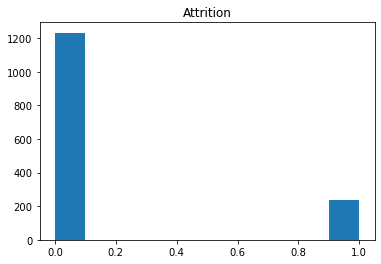

In [9]:
data["Attrition"].hist(grid=False)
plt.title("Attrition")
plt.show()

In [10]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [11]:
#deleting unwanted columns
data=data.drop(["Gender","JobRole"],axis=1)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,94,3,2,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,61,2,2,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,92,2,1,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,56,3,1,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,40,3,1,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,3,41,4,2,4,1,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,4,42,2,3,1,1,9991,21457,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,2,87,4,2,2,1,6142,5174,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,63,2,2,2,1,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8


# checking correlation

In [12]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,-0.095029,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,0.162070,-0.159840,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,0.026528,0.039062,0.019311,-0.033962,0.024001,0.034319,-0.014107,0.020875,NaN,0.016543,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,-0.069586,0.007707,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,-0.004144,-0.024586,0.101963,0.021001,0.056073,0.053130,0.023642,-0.035882,NaN,0.007481,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.004053,0.094961,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,-0.021941,-0.002655,-0.044933,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,NaN,0.002259,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,NaN,-0.024037,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


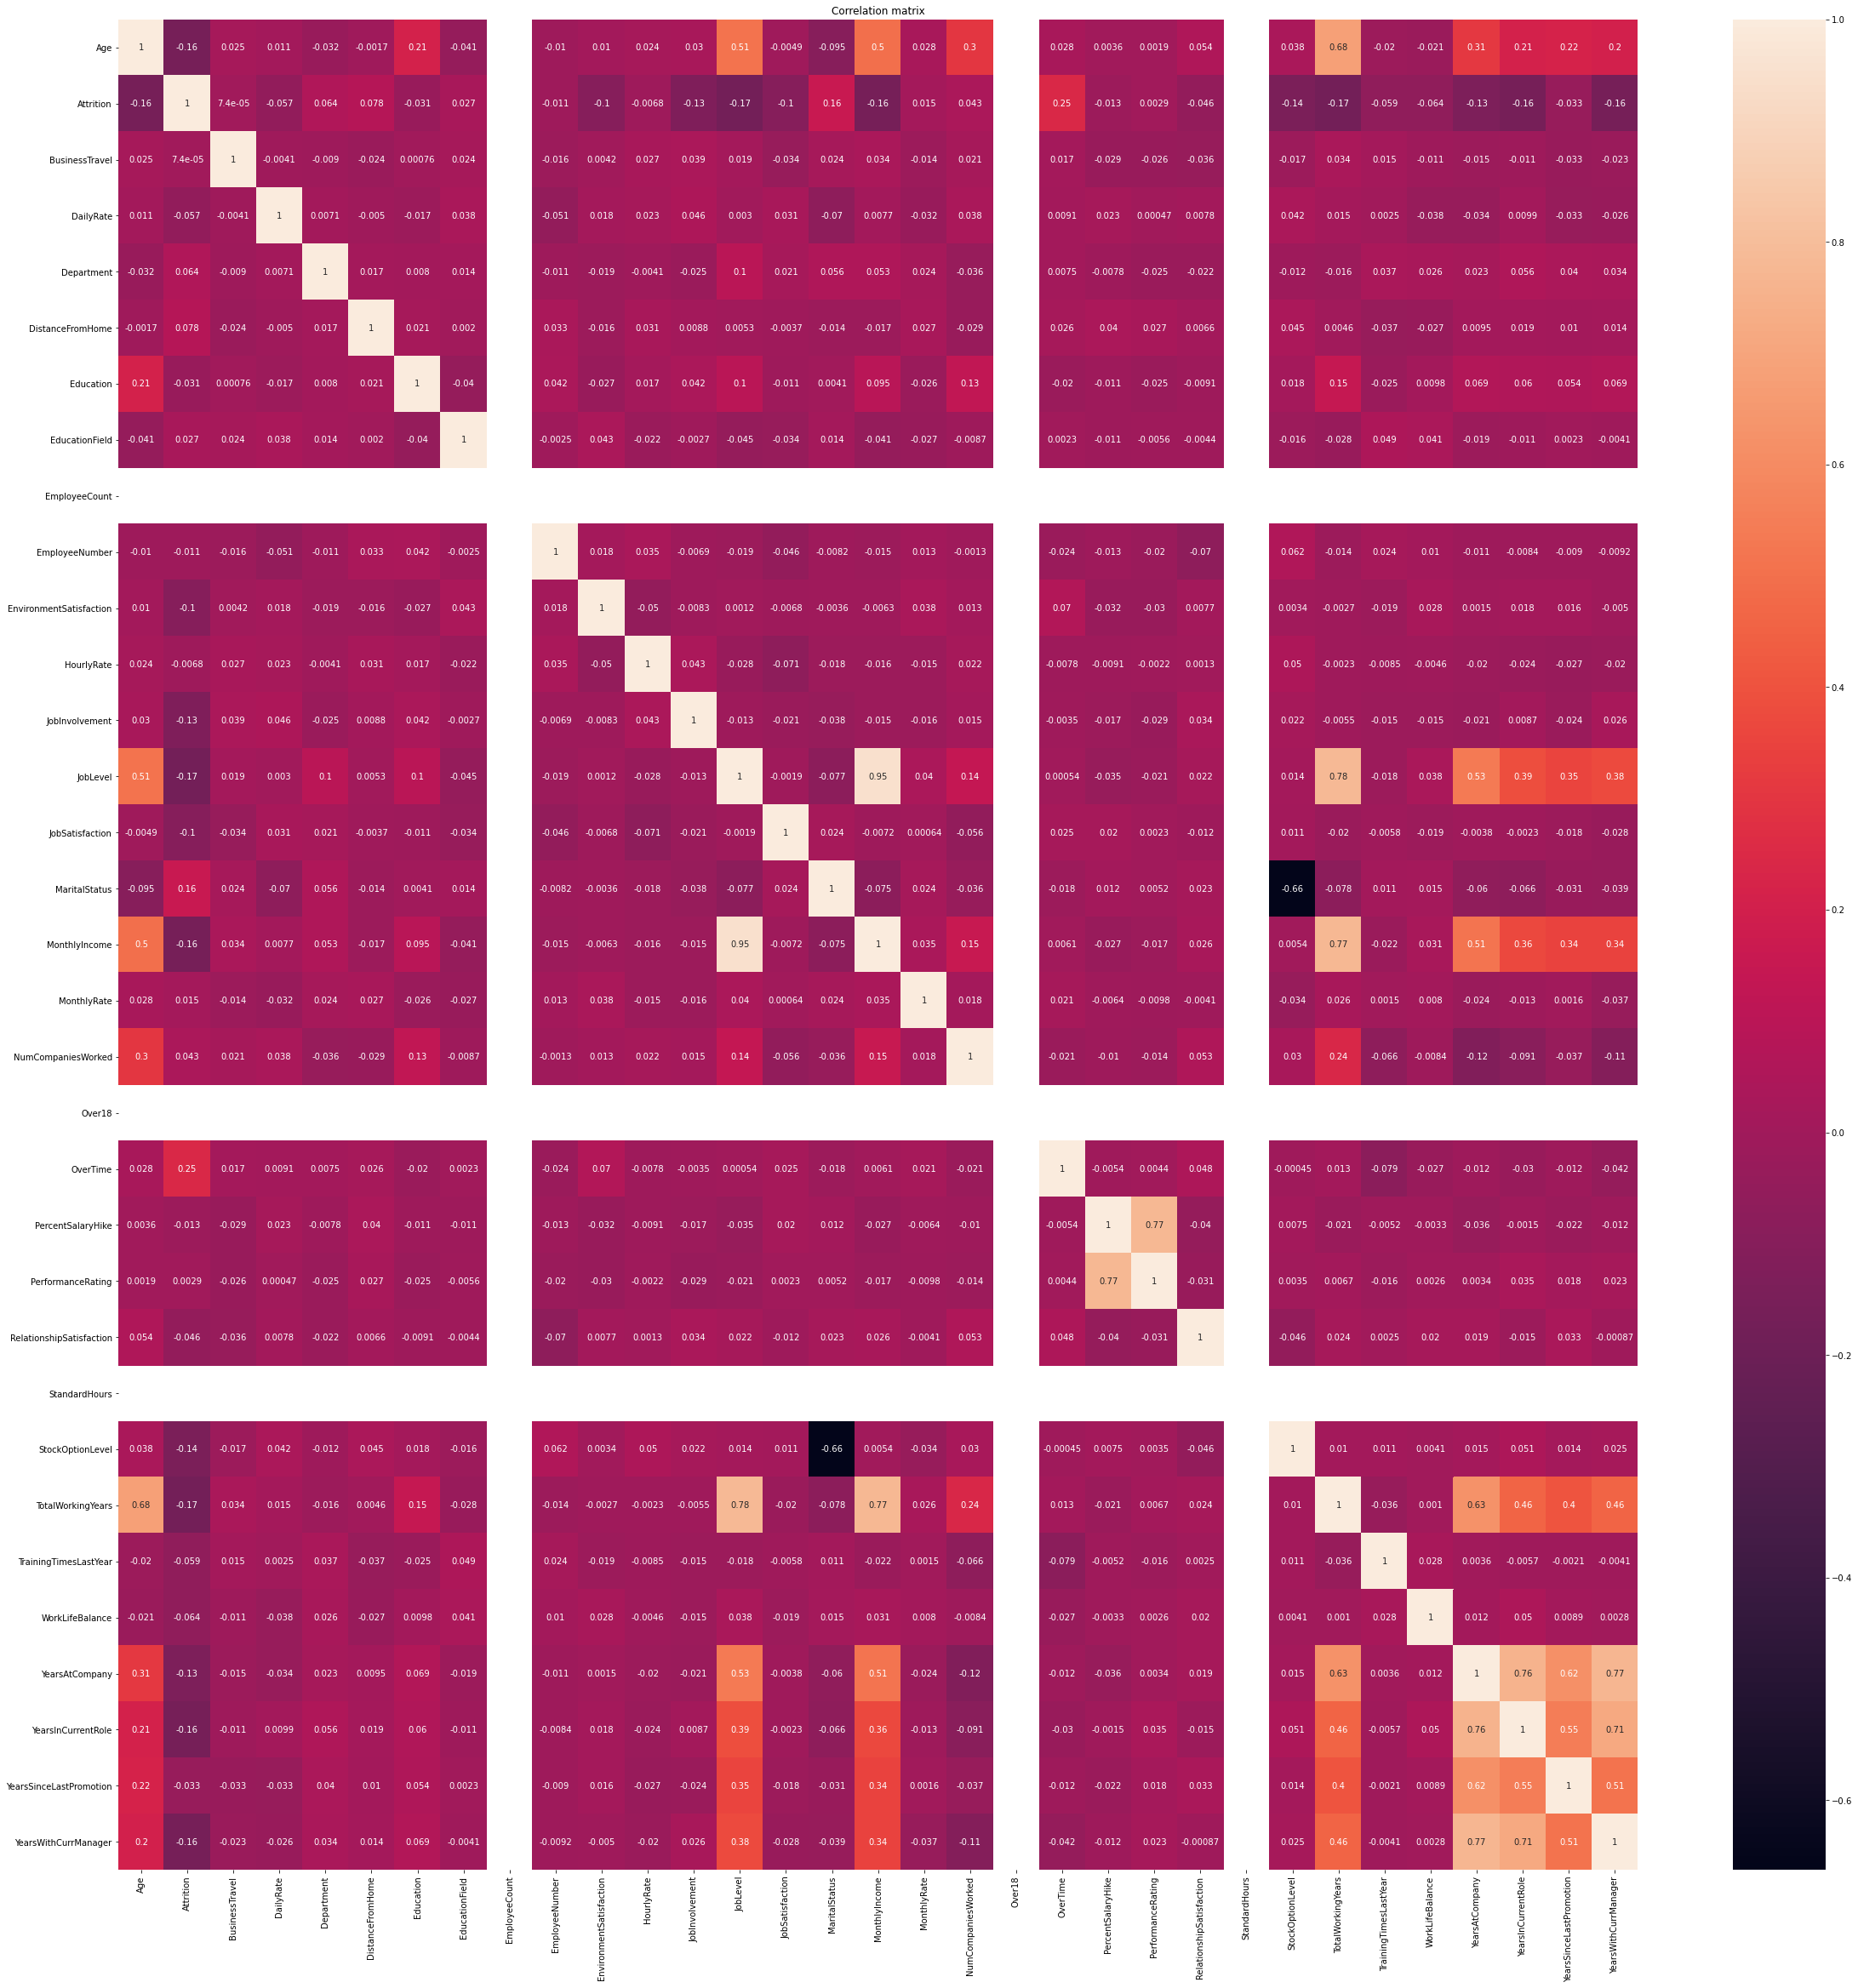

In [31]:
#plotting graph for correlation
plt.figure(figsize=[40,40])

#plot the correlation matrix
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

In [47]:
#some columns are highly correlated so lets drop them
data=data.drop(["TotalWorkingYears","JobLevel"],axis=1)
data=data.drop(["YearsAtCompany"],axis=1)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,94,3,4,2,5993,19479,8,0,1,11,3,1,80,0,0,1,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,61,2,2,1,5130,24907,1,0,0,23,4,4,80,1,3,3,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,92,2,3,2,2090,2396,6,0,1,15,3,2,80,0,3,3,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,56,3,3,1,2909,23159,1,0,1,11,3,3,80,0,3,3,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,40,3,2,1,3468,16632,9,0,0,12,3,4,80,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,3,41,4,4,1,2571,12290,4,0,0,17,3,3,80,1,3,3,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,4,42,2,1,1,9991,21457,4,0,0,15,3,1,80,1,5,3,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,2,87,4,2,1,6142,5174,1,0,1,20,4,2,80,1,0,3,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,63,2,2,1,5390,13243,2,0,0,14,3,4,80,0,3,2,6,0,8


In [48]:
corr_matrix=data.corr()
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
Department                  0.063991
NumCompaniesWorked          0.043494
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
E

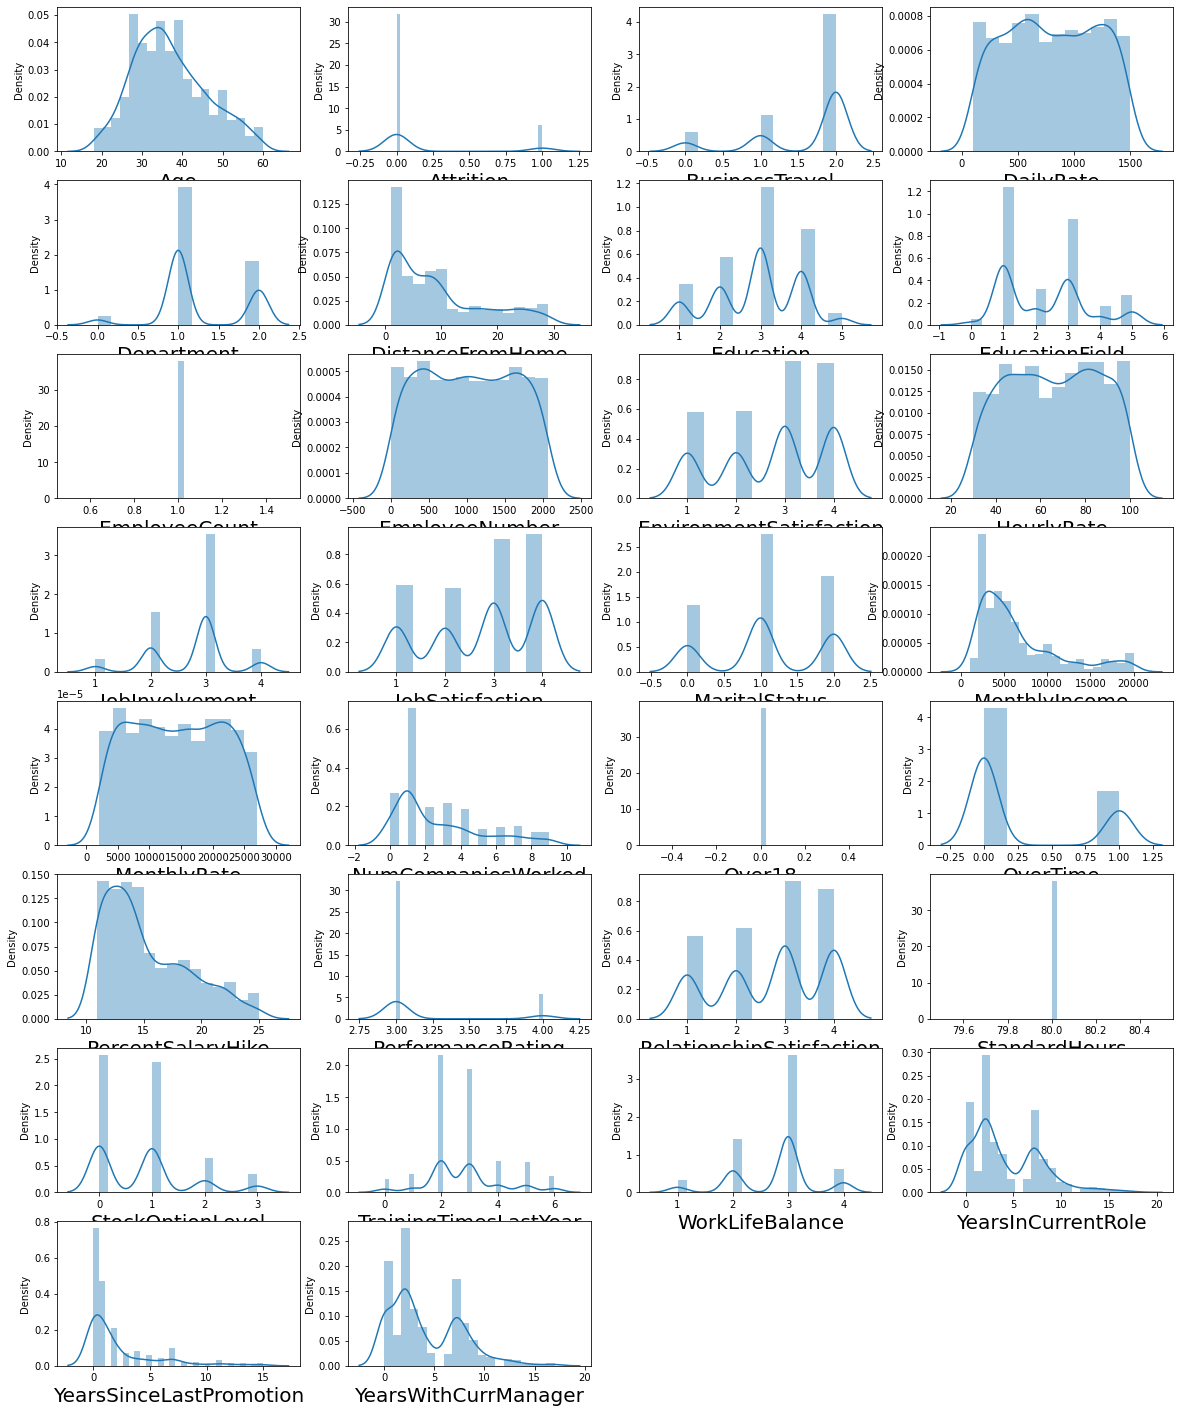

In [49]:
#let's check the data distribution among all the columns



plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [50]:
#distribute data into label and features
x=data.drop(["Attrition"],axis=1)
y=data["Attrition"]

In [51]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,94,3,4,2,5993,19479,8,0,1,11,3,1,80,0,0,1,4,0,5
1,49,1,279,1,8,1,1,1,2,3,61,2,2,1,5130,24907,1,0,0,23,4,4,80,1,3,3,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,92,2,3,2,2090,2396,6,0,1,15,3,2,80,0,3,3,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,56,3,3,1,2909,23159,1,0,1,11,3,3,80,0,3,3,7,3,0
4,27,2,591,1,2,1,3,1,7,1,40,3,2,1,3468,16632,9,0,0,12,3,4,80,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,41,4,4,1,2571,12290,4,0,0,17,3,3,80,1,3,3,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,42,2,1,1,9991,21457,4,0,0,15,3,1,80,1,5,3,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,87,4,2,1,6142,5174,1,0,1,20,4,2,80,1,0,3,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,63,2,2,1,5390,13243,2,0,0,14,3,4,80,0,3,2,6,0,8


In [52]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

# checking skewness

In [53]:
x.skew().sort_values()

BusinessTravel             -1.439006
WorkLifeBalance            -0.552480
JobInvolvement             -0.498419
JobSatisfaction            -0.329672
EnvironmentSatisfaction    -0.321654
RelationshipSatisfaction   -0.302828
Education                  -0.289681
MaritalStatus              -0.152175
HourlyRate                 -0.032311
DailyRate                  -0.003519
Over18                      0.000000
EmployeeCount               0.000000
StandardHours               0.000000
EmployeeNumber              0.016574
MonthlyRate                 0.018578
Department                  0.172231
Age                         0.413286
EducationField              0.550371
TrainingTimesLastYear       0.553124
PercentSalaryHike           0.821128
YearsWithCurrManager        0.833451
YearsInCurrentRole          0.917363
DistanceFromHome            0.958118
OverTime                    0.964489
StockOptionLevel            0.968980
NumCompaniesWorked          1.026471
MonthlyIncome               1.369817
P

we can see skewness in most of the columns. lets treat it using power_transform

In [54]:
#remove skewness

from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.522140,0.635468,0.759289,1.377454,-1.494085,-0.916940,-0.960488,0.0,-2.164110,-0.706596,1.354630,0.326033,1.192743,1.235505,0.0,0.747689,1.621331,0.0,1.591746,-1.488918,-0.423557,-1.529513,0.0,-1.087933,-2.579073,-2.144446,0.205562,-1.094862,0.490147
1,1.276411,-1.392865,-1.334597,-0.472127,0.243416,-1.771185,-0.960488,0.0,-2.154174,0.208597,-0.210675,-1.058710,-0.709062,-0.131447,0.0,1.397293,-0.571302,0.0,-0.628241,1.679689,2.348814,1.229016,0.0,0.548969,0.217384,0.276821,0.883888,0.096854,0.909635
2,0.102091,0.635468,1.340365,-0.472127,-1.031215,-0.916940,1.247620,0.0,-2.136953,1.209516,1.263094,-1.058710,0.197856,1.235505,0.0,-1.882611,1.271339,0.0,1.591746,0.201133,-0.423557,-0.700130,0.0,-1.087933,0.217384,0.276821,-1.596434,-1.094862,-1.550156
3,-0.353971,-1.392865,1.379936,-0.472127,-0.700347,1.082871,-0.960488,0.0,-2.129176,1.209516,-0.460197,0.326033,0.197856,-0.131447,0.0,1.193001,-0.571302,0.0,1.591746,-1.488918,-0.423557,0.225164,0.0,-1.087933,0.217384,0.276821,0.883888,0.905592,-1.550156
4,-1.123755,0.635468,-0.453941,-0.472127,-1.031215,-1.771185,0.697390,0.0,-2.114724,-1.518118,-1.289301,0.326033,-0.709062,-0.131447,0.0,0.386371,1.766182,0.0,-0.628241,-0.948760,-0.423557,1.229016,0.0,0.548969,0.217384,0.276821,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.008279,-1.392865,0.264672,-0.472127,1.407126,-0.916940,0.697390,0.0,1.536992,0.208597,-1.235882,2.014107,1.192743,-0.131447,0.0,-0.201548,0.792695,0.0,-0.628241,0.719724,-0.423557,0.225164,0.0,0.548969,0.217384,0.276821,-0.446645,-1.094862,-0.053000
1466,0.316210,0.635468,-0.397219,-0.472127,-0.050827,-1.771185,0.697390,0.0,1.538245,1.209516,-1.182703,-1.058710,-1.509980,-0.131447,0.0,0.989784,0.792695,0.0,-0.628241,0.201133,-0.423557,-1.529513,0.0,0.548969,1.615639,0.276821,0.883888,0.096854,0.909635
1467,-1.123755,0.635468,-1.751713,-0.472127,-0.442291,0.040522,-0.960488,0.0,1.540748,-0.706596,1.032601,2.014107,-0.709062,-0.131447,0.0,-1.325846,-0.571302,0.0,1.591746,1.281630,2.348814,-0.700130,0.0,0.548969,-2.579073,0.276821,-0.446645,-1.094862,-0.053000
1468,1.276411,-1.392865,0.583235,1.377454,-1.031215,0.040522,0.697390,0.0,1.542000,1.209516,-0.111945,-1.058710,-0.709062,-0.131447,0.0,-0.067983,0.043423,0.0,-0.628241,-0.121307,-0.423557,1.229016,0.0,-1.087933,0.217384,-1.108624,0.682995,-1.094862,1.090110


In [55]:
#validating that skewness has been removed or not

x.skew().sort_values(ascending=False)

PerformanceRating           1.921883
OverTime                    0.964489
YearsSinceLastPromotion     0.212129
PercentSalaryHike           0.116250
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
NumCompaniesWorked          0.014814
Department                  0.013801
MonthlyIncome               0.000000
EmployeeCount               0.000000
StandardHours               0.000000
Over18                      0.000000
DistanceFromHome           -0.007468
Age                        -0.007603
EducationField             -0.008386
WorkLifeBalance            -0.012286
JobInvolvement             -0.020365
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.099881
HourlyRate                 -0.106461
MaritalStatus              -0.156911
MonthlyRate                -0.184087
RelationshipSatisfaction   -0.193634
DailyRate                  -0.196160
EnvironmentSatisfaction    -0.205395
JobSatisfaction            -0.212815
E

# checking outliers

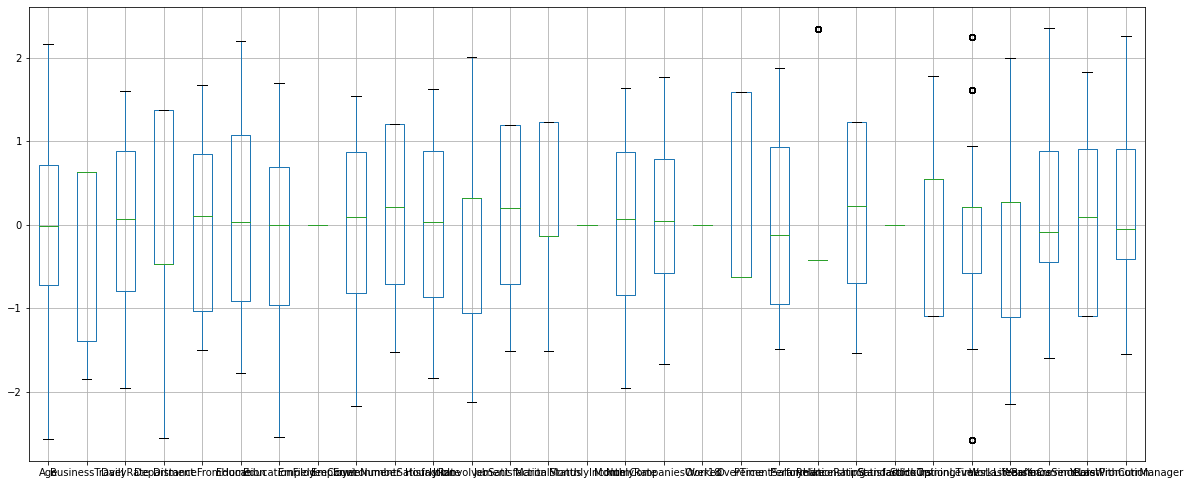

In [56]:
#plotting boxplot for columns
x.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

there are very few outliers so let proceed further

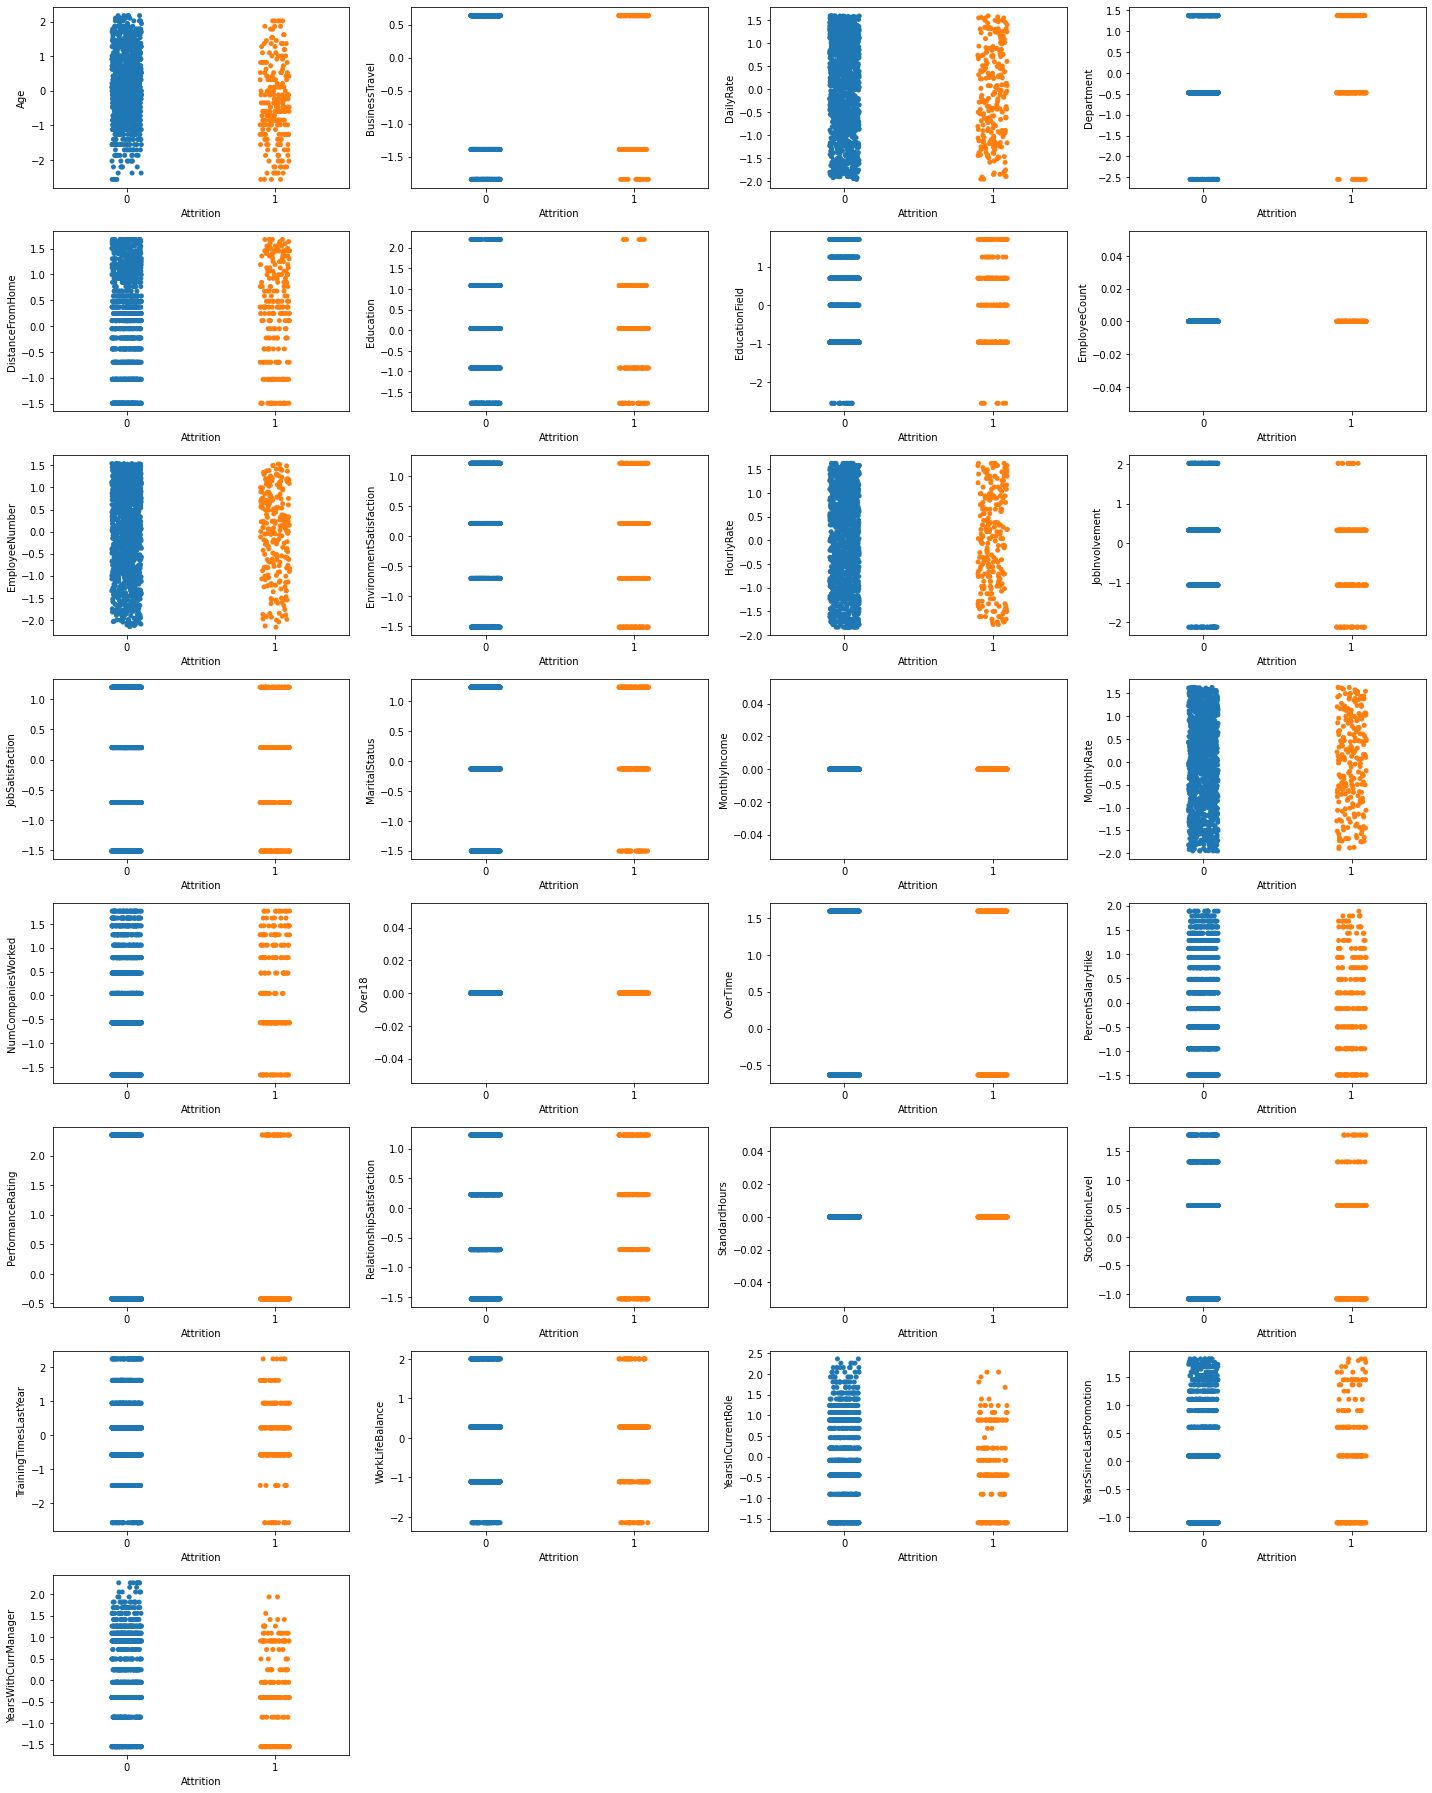

In [57]:
#let's see how features are related to class
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()


lets proceed for training process

# data scaling

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.52213976,  0.63546836,  0.7592893 , ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.39286498, -1.33459724, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  0.63546836,  1.34036452, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507,  0.63546836, -1.75171312, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097, -1.39286498,  0.58323545, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832,  0.63546836, -0.35884464, ..., -0.08961473,
         0.09685415, -0.40688122]])

In [59]:
x_scaled.shape[1]

29

In [60]:
#finding variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

In [61]:
vif

,vif,Features
0,1.295216,Age
1,1.010302,BusinessTravel
2,1.022258,DailyRate
3,1.023537,Department
4,1.011650,DistanceFromHome
5,1.069449,Education
6,1.022572,EducationField
7,NaN,EmployeeCount
8,1.023206,EmployeeNumber
9,1.017257,EnvironmentSatisfaction


as all the values are less than 5 that means no multicollinearity. now we can go ahead

# training process

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [63]:
#finding best random state

maxAccu=0    #maximum accuracy
maxRS=0   #best random state value for which max accuracy is achived

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is :",maxAccu,"on Random state",maxRS)

best accuracy is : 0.8967391304347826 on Random state 26


we have found best random state value . now we will create our train_test_split using random_state

In [64]:
#cretaing train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=26)

In [65]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
490,0.210221,0.635468,-1.082833,-0.472127,-1.494085,-1.771185,-0.960488,0.0,-0.492903,0.208597,-1.129758,0.326033,-1.509980,1.235505,0.0,0.112282,0.468789,0.0,-0.628241,0.719724,-0.423557,1.229016,0.0,-1.087933,0.217384,-1.108624,-1.596434,-1.094862,-1.550156
969,1.187519,0.635468,0.196636,-0.472127,-0.442291,0.040522,-0.960488,0.0,0.608871,1.209516,-0.561151,0.326033,1.192743,1.235505,0.0,0.651181,-0.571302,0.0,-0.628241,-1.488918,-0.423557,0.225164,0.0,-1.087933,-0.578785,0.276821,1.234941,-1.094862,1.090110
1190,-0.474486,0.635468,0.479120,-0.472127,-1.031215,0.040522,0.697390,0.0,1.033041,1.209516,-1.024542,0.326033,-0.709062,-1.505270,0.0,1.467721,-1.664787,0.0,-0.628241,-0.499665,-0.423557,0.225164,0.0,1.313755,0.942515,-1.108624,0.459273,0.096854,0.711239
911,-1.408993,-1.392865,-0.433253,1.377454,1.456094,-1.771185,-0.960488,0.0,0.479522,0.208597,0.373380,-2.120625,1.192743,1.235505,0.0,-0.839155,-0.571302,0.0,1.591746,-0.121307,-0.423557,1.229016,0.0,-1.087933,0.942515,0.276821,-1.596434,0.096854,-1.550156
462,-0.236188,0.635468,-1.401197,1.377454,1.302896,1.082871,-0.960488,0.0,-0.566442,1.209516,0.421204,2.014107,1.192743,1.235505,0.0,0.802377,-0.571302,0.0,-0.628241,-0.948760,-0.423557,1.229016,0.0,-1.087933,0.217384,0.276821,0.883888,1.252109,0.909635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,-0.474486,0.635468,0.123248,-0.472127,-0.230523,-0.916940,-0.960488,0.0,0.876373,1.209516,0.083791,-1.058710,-0.709062,-0.131447,0.0,0.254271,0.468789,0.0,-0.628241,-0.948760,-0.423557,-1.529513,0.0,0.548969,-0.578785,0.276821,-0.908168,0.607464,0.490147
1126,1.363928,0.635468,-1.382031,1.377454,0.367247,0.040522,-0.000004,0.0,0.925368,0.208597,-0.310010,0.326033,0.197856,-0.131447,0.0,0.752653,0.792695,0.0,1.591746,0.478687,-0.423557,0.225164,0.0,0.548969,-0.578785,0.276821,-1.596434,-1.094862,-1.550156
1456,-0.121000,-1.392865,0.971089,-0.472127,1.127721,1.082871,-0.960488,0.0,1.521951,0.208597,0.705687,0.326033,0.197856,-0.131447,0.0,1.361023,-0.571302,0.0,1.591746,-0.121307,-0.423557,1.229016,0.0,1.313755,-0.578785,1.998177,-0.446645,-1.094862,-0.406881
1342,-0.236188,0.635468,1.561443,1.377454,-0.442291,0.040522,-0.960488,0.0,1.309711,0.208597,-0.062799,0.326033,1.192743,-0.131447,0.0,1.343594,0.043423,0.0,1.591746,-0.499665,-0.423557,1.229016,0.0,1.785018,0.217384,0.276821,-0.089615,0.096854,-1.550156


In [66]:
y_train

490     0
969     0
1190    0
911     1
462     0
       ..
1101    0
1126    0
1456    0
1342    0
821     0
Name: Attrition, Length: 1102, dtype: int32

In [67]:
x_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1402,-0.597882,0.635468,1.136093,-0.472127,-1.031215,-1.771185,0.697390,0.0,1.427319,1.209516,-0.310010,-2.120625,1.192743,-1.505270,0.0,0.502896,-0.571302,0.0,1.591746,-1.488918,-0.423557,0.225164,0.0,1.785018,0.942515,0.276821,-1.596434,-1.094862,-1.550156
1223,1.097202,-1.392865,0.739400,1.377454,0.367247,0.040522,-0.960488,0.0,1.092909,0.208597,0.799617,-2.120625,0.197856,-0.131447,0.0,1.310977,1.458092,0.0,-0.628241,-1.488918,-0.423557,0.225164,0.0,-1.087933,0.217384,-2.144446,0.459273,1.797979,1.409863
1415,-0.353971,-1.846466,1.214466,-0.472127,-1.494085,-0.916940,0.697390,0.0,1.452661,-0.706596,-0.310010,-1.058710,0.197856,-1.505270,0.0,0.866027,-0.571302,0.0,-0.628241,-0.948760,-0.423557,0.225164,0.0,1.785018,-0.578785,-1.108624,-0.908168,-1.094862,-1.550156
997,-1.123755,0.635468,-1.825977,-0.472127,1.063256,1.082871,-0.960488,0.0,0.668329,1.209516,-0.713897,0.326033,0.197856,1.235505,0.0,1.486427,-0.571302,0.0,1.591746,-0.499665,-0.423557,1.229016,0.0,-1.087933,-0.578785,0.276821,-0.446645,1.454429,0.909635
724,-1.558076,0.635468,0.986200,-0.472127,1.063256,-1.771185,0.697390,0.0,0.082552,1.209516,-1.235882,-1.058710,0.197856,-1.505270,0.0,1.305492,-0.571302,0.0,-0.628241,0.201133,-0.423557,-0.700130,0.0,1.313755,2.248381,0.276821,-0.446645,0.905592,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,-0.724322,0.635468,0.921280,-0.472127,1.247250,0.040522,1.247620,0.0,0.198274,0.208597,0.939716,0.326033,-1.509980,-0.131447,0.0,-0.673175,-1.664787,0.0,-0.628241,0.201133,-0.423557,0.225164,0.0,0.548969,-1.481770,-1.108624,-0.446645,-1.094862,-0.406881
218,0.912074,-1.846466,0.648255,1.377454,-0.050827,0.040522,0.697390,0.0,-1.204842,1.209516,-0.409972,-1.058710,1.192743,1.235505,0.0,0.413340,1.271339,0.0,-0.628241,-0.948760,-0.423557,1.229016,0.0,-1.087933,-0.578785,0.276821,0.883888,1.730033,1.090110
285,0.102091,0.635468,1.338278,-0.472127,-1.494085,0.040522,-0.960488,0.0,-1.011736,1.209516,-1.182703,0.326033,1.192743,1.235505,0.0,0.288178,-0.571302,0.0,-0.628241,-0.948760,-0.423557,-0.700130,0.0,-1.087933,0.217384,0.276821,1.673556,1.252109,0.909635
691,0.420154,-1.392865,1.538909,-0.472127,0.367247,1.082871,0.697390,0.0,0.011850,1.209516,-1.560252,0.326033,-0.709062,-1.505270,0.0,1.415321,1.621331,0.0,1.591746,-0.121307,-0.423557,1.229016,0.0,0.548969,-0.578785,0.276821,-0.908168,-1.094862,-1.550156


In [68]:
y_test

1402    0
1223    1
1415    0
997     1
724     0
       ..
782     0
218     0
285     0
691     0
629     0
Name: Attrition, Length: 368, dtype: int32

# logistic regression

In [69]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 89.67391304347827
[[316  10]
 [ 28  14]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       326
           1       0.58      0.33      0.42        42

    accuracy                           0.90       368
   macro avg       0.75      0.65      0.68       368
weighted avg       0.88      0.90      0.88       368



# decision tree classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 79.07608695652173
[[272  54]
 [ 23  19]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.88       326
           1       0.26      0.45      0.33        42

    accuracy                           0.79       368
   macro avg       0.59      0.64      0.60       368
weighted avg       0.85      0.79      0.81       368



# random forest classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 89.94565217391305
[[323   3]
 [ 34   8]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       326
           1       0.73      0.19      0.30        42

    accuracy                           0.90       368
   macro avg       0.82      0.59      0.62       368
weighted avg       0.88      0.90      0.87       368



# SVC(support vector classifier)

In [72]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 90.48913043478261
[[323   3]
 [ 32  10]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       326
           1       0.77      0.24      0.36        42

    accuracy                           0.90       368
   macro avg       0.84      0.61      0.66       368
weighted avg       0.89      0.90      0.88       368



LogisticRegression,RandomForest and SVC are predicting good accuracy. now we will check cross validation score as well for overfitting

# cross validation

In [74]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("Cross Validation score of Logistic Regression model:",scr.mean()*100)

Cross Validation score of Logistic Regression model: 86.5986394557823


In [75]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation score of Random FOrest:",scr.mean()*100)

Cross Validation score of Random FOrest: 85.37414965986395


In [76]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation score of SVC:",scr.mean()*100)

Cross Validation score of SVC: 85.71428571428571


LogisticRegression is performing best among all so we will continue with LogisticRegression

# Hyperparameter tuning

In [77]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [78]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)


In [79]:
grid_predictions = grid.predict(x_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       326
           1       0.71      0.29      0.41        42

    accuracy                           0.90       368
   macro avg       0.81      0.64      0.68       368
weighted avg       0.89      0.90      0.89       368



# ROC AUC Plot

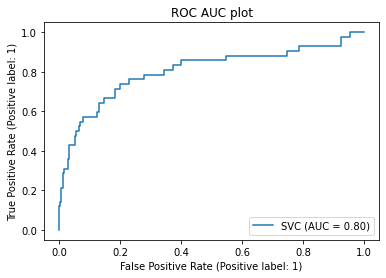

In [80]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

so now final accuracy is 90% and AUC is 80% which is good